In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

###`Q 1-3` Using the 'diamonds' dataset - sns.load_dataset('diamonds')
1. Create a violinplot of 'price' grouped by 'cut'.
2. Create regplot on `carat` vs `price`. and give hue on 'cut'
3. Create boxplot on 'color' and 'price'

In [3]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='price', ylabel='cut'>

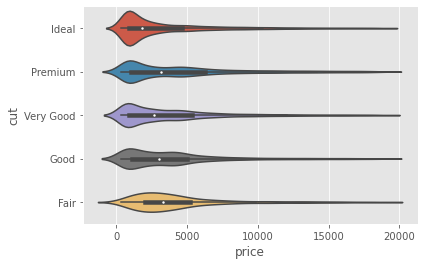

In [4]:
#Create a violinplot of 'price' grouped by 'cut'.
sns.violinplot(data=df,x='price',y='cut')

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

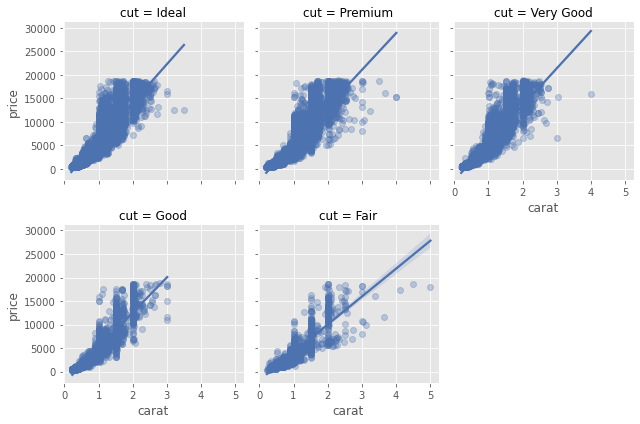

In [6]:
#Create regplot on carat vs price. and give hue on 'cut'
# Create a regplot on each subplot
sns.set_palette("deep")
g = sns.FacetGrid(data=df, col='cut', col_wrap=3, height=3)
g.map(sns.regplot, 'carat', 'price', fit_reg=True, scatter_kws={'alpha':0.3})

# Show the plot
plt.show()

<AxesSubplot:xlabel='price', ylabel='color'>

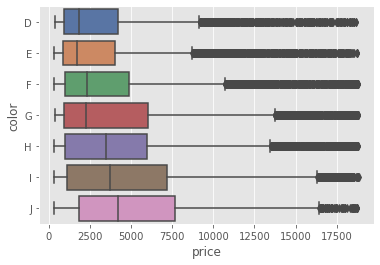

In [7]:
#Create boxplot on 'color' and 'price'
sns.boxplot(data=df,y='color',x='price')


### `Q 4` Using the 'Taxis' dataset - sns.load_dataset('taxis')

4.1. Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.

4.2. Create a regression plot on time of ride  vs total fare. You will need to calculate ride time using pickup and dropoff column. 

4.3 Give hue on payment type. and Another plot hue on taxi 'color'. Observe the plot.

In [8]:
# code here
import seaborn as sns
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


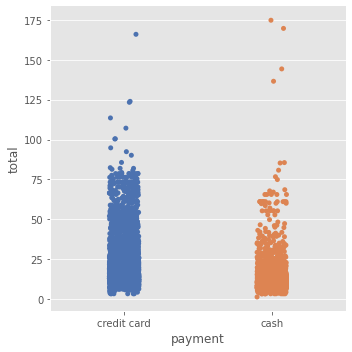

In [9]:
sns.catplot(data=df,y='total',x='payment')

 Create a regression plot on time of ride vs total fare. You will need to calculate ride time using pickup and dropoff column.

In [34]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])
df['Time_of_ride'] = df['dropoff'] - df['pickup']
df['minutes_ride'] = pd.to_timedelta(df['Time_of_ride'],unit='m')

In [41]:
df['minutes_ride']

0      0 days 00:06:15
1      0 days 00:07:05
2      0 days 00:07:24
3      0 days 00:25:52
4      0 days 00:09:32
             ...      
6428   0 days 00:03:34
6429   0 days 00:56:23
6430   0 days 00:19:07
6431   0 days 00:05:04
6432   0 days 00:16:40
Name: minutes_ride, Length: 6433, dtype: timedelta64[ns]

In [42]:
def extrac_minutes(x):
    td = pd.Timedelta(x)
    minutes = int(td.total_seconds() / 60)
    return minutes
df['minutes_ride'] = df['minutes_ride'].apply(extrac_minutes)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,Time_of_ride,minutes_ride
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0 days 00:06:15,6
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0 days 00:07:05,7
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0 days 00:07:24,7
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0 days 00:25:52,25
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0 days 00:09:32,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,0 days 00:03:34,3
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0 days 00:56:23,56
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,0 days 00:19:07,19
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,0 days 00:05:04,5


<AxesSubplot:xlabel='total', ylabel='minutes_ride'>

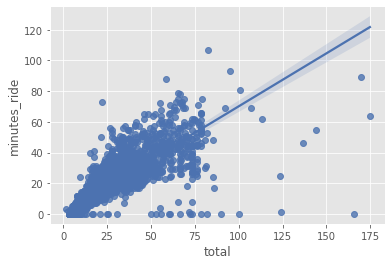

In [43]:
sns.regplot(data=df,y='minutes_ride',x='total')

## Problem 5-12:

### **`Problem 5:`** Draw a strip plot and swarm plot between "gender" and "bloodpressure" w.r.t "smoker" (use as hue parameter). Also add title to the charts.

In [51]:
df=pd.read_csv('Data-sets/insurance_data - insurance_data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


<AxesSubplot:xlabel='gender', ylabel='bloodpressure'>

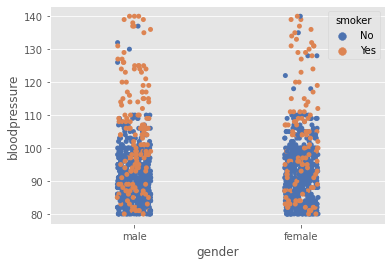

In [52]:
# code here
sns.stripplot(data=df,x='gender',y='bloodpressure',hue='smoker')

### **`Problem 6:`** Draw a Box-plot and a Violin plot of which x-axis represents the "region" and the y-axis represents the "bmi". Also add extra information of the column "diabetic".

<AxesSubplot:xlabel='region', ylabel='bmi'>

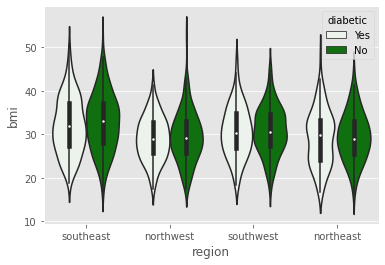

In [56]:
# code here
sns.violinplot(data=df,x='region',y='bmi',hue='diabetic',color='g')

### **`Problem  7:`** Draw a bar plot and point plot of which x-axis represents the "gender" and y-axis represents "claim". Also add extra information about "smoker" column.

<AxesSubplot:xlabel='gender', ylabel='claim'>

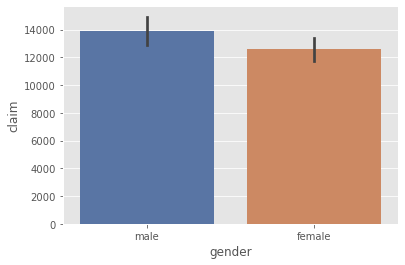

In [69]:
# code here
sns.barplot(data=df,x='gender',y='claim')

### **`Problem 8:`** Draw a reg plot between "age" and "bmi" columns.

<AxesSubplot:xlabel='age', ylabel='bmi'>

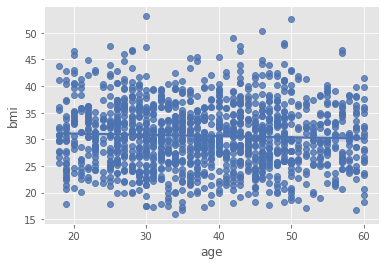

In [70]:
# code here
sns.regplot(data=df,x='age',y='bmi')

### **`Problem 9:`** Draw a pair plot of the insurance data. Use "gender" as hue parameter.

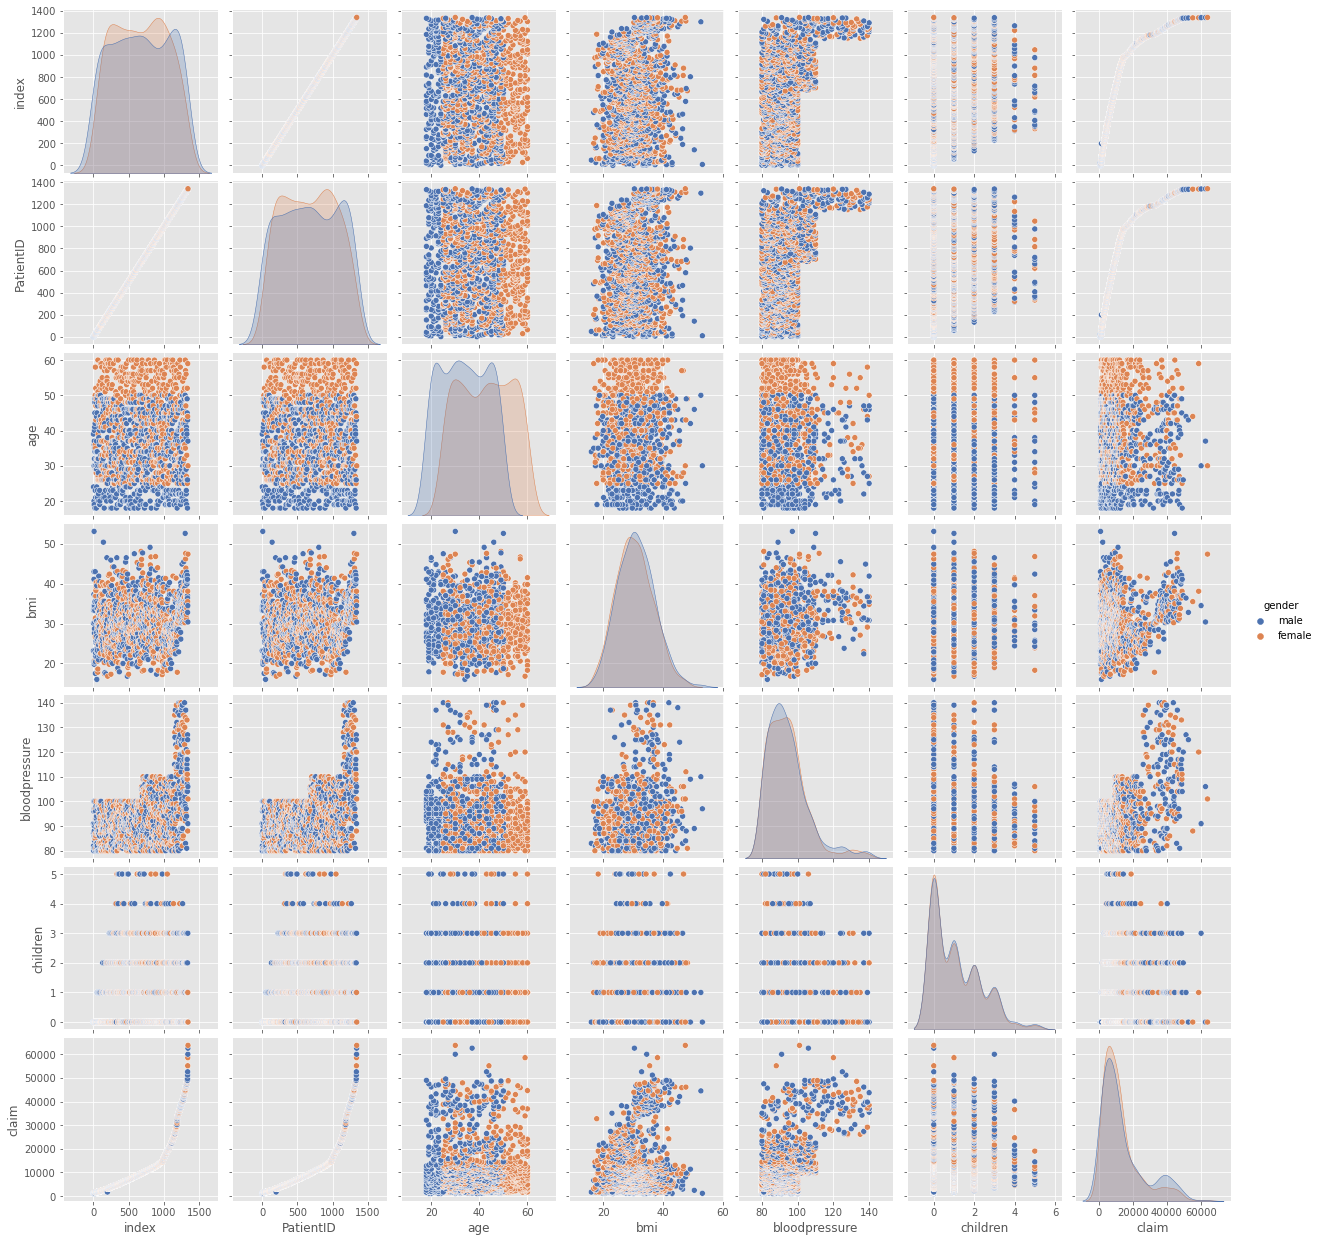

In [67]:
# code here
sns.pairplot(df,hue='gender')

### **`Problem 10:`** Draw a pair grid of the insurance data and use "diabetic" column as a hue parameter. Also, make the diagonal plots as box-plot, upper parts as scatter plot and the lower parts as kde plot.

LinAlgError: singular matrix

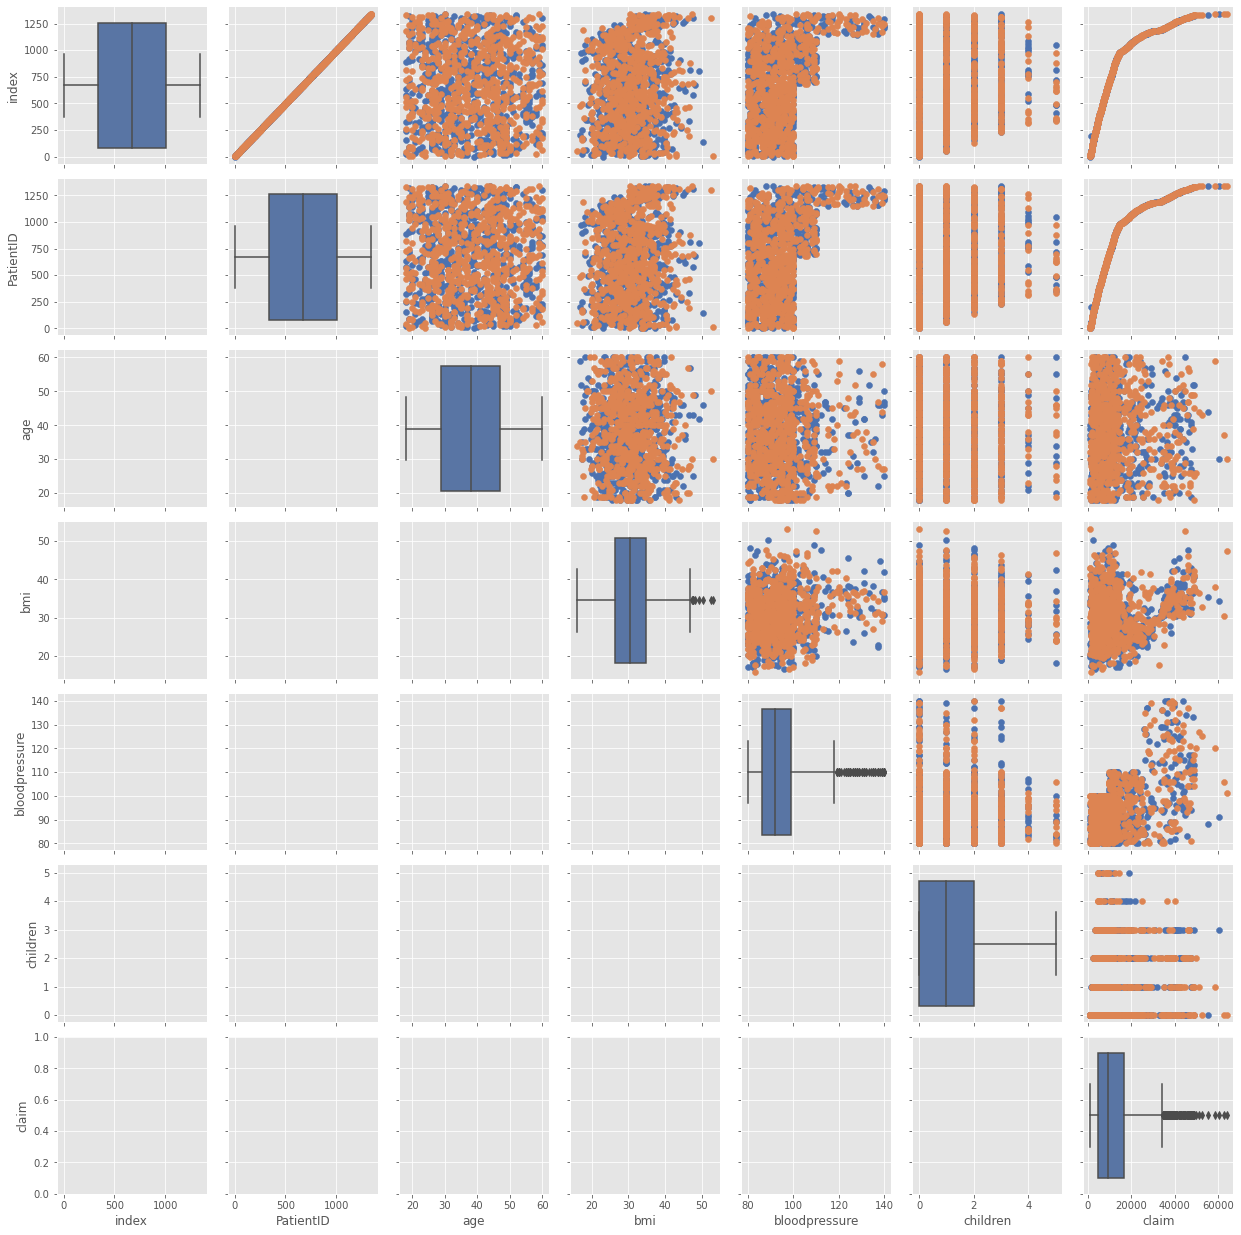

In [77]:
# code here
import seaborn as sns

# load the insurance data into a DataFrame


# create a pair grid with the diabetic column as the hue parameter
g = sns.PairGrid(data=df, hue="diabetic")

# set the diagonal plots as box-plots
g.map_diag(sns.boxplot)

# set the upper plots as scatter plots
g.map_upper(plt.scatter)

# set the lower plots as kde plots
g.map_lower(sns.kdeplot)

# add a title to the charts
g.fig.suptitle("Insurance Data by Diabetic Status")

# show the plots
plt.show()


### **`Prolem 11:`** Draw a joint plot as scatter between "bloodpressure" and "bmi". Use "smoker" as hue parameter.

<AxesSubplot:xlabel='bloodpressure', ylabel='bmi'>

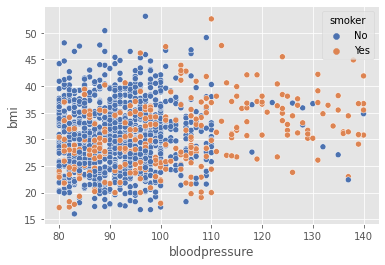

In [57]:
# code here
sns.scatterplot(data=df,x='bloodpressure',y='bmi',hue='smoker')

### **`Problem 12:`** Draw a joint grid of which x-axis represents "age" and y-axis represents "claim". Draw 

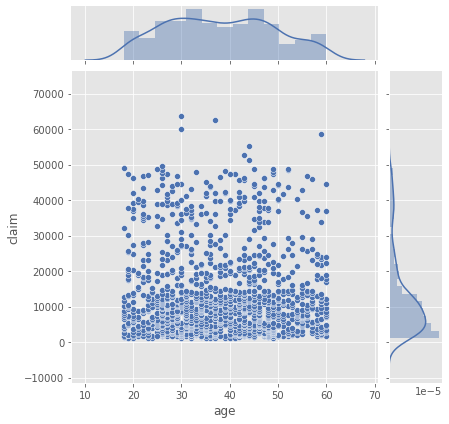

In [79]:
# code here
from warnings import filterwarnings
filterwarnings('ignore')
g = sns.JointGrid(data=df, x="age", y="claim")
g.plot(sns.scatterplot, sns.distplot)